In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import pickle
import cv2
%matplotlib inline

In [2]:
# load all the models
haar = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')
# pickle files
mean = pickle.load(open('./data/mean_preprocess.pickle','rb'))
model_svm = pickle.load(open('./model_svm.pickle','rb'))
model_pca = pickle.load(open('./data/pca_50.pickle','rb'))
print('Model loaded sucessfully')

Model loaded sucessfully


In [3]:
gender_pre = ['Male','Female']
font = cv2.FONT_HERSHEY_SIMPLEX

In [4]:
# test data
test_data_path = './data/male_000281.jpg'
color = 'bgr'
# step=1: read image
img = cv2.imread(test_data_path)
def pipeline_model(img,color='rgb'):
    if color =='bgr':
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    else:
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    faces = haar.detectMultiScale(gray,1.5,3)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        roi = gray[y:y+h,x:x+w]
        roi = roi / 255.0
        if roi.shape[1] > 100:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_AREA)
        else:
            roi_resize = cv2.resize(roi,(100,100),cv2.INTER_CUBIC)
        roi_reshape = roi_resize.reshape(1,10000)
        roi_mean = roi_reshape - mean
        eigen_image = model_pca.transform(roi_mean)
        results = model_svm.predict_proba(eigen_image)[0]
        predict = results.argmax()
        score = results[predict]
        text = "%s : %0.2f"%(gender_pre[predict],score)
        cv2.putText(img,text,(x,y),font,1,(0,255,0),2)
    return img

In [5]:
from PIL import Image

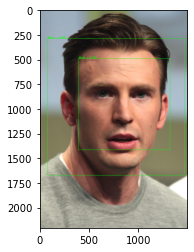

In [6]:
test_data_path = './data/male_000281.jpg'
color = 'bgr'
# step-1: read image
img = Image.open(test_data_path)
# step-2: convert into array
img = np.array(img)
# step-3: pass to pipeline model
img = pipeline_model(img)
plt.imshow(img)

In [7]:
cap = cv2.VideoCapture('./data/video.mp4')
while True:
    ret, frame = cap.read()
    
    if ret == False:
        break
        
    frame = pipeline_model(frame,color='bgr')
        
    cv2.imshow('Gender Detector',frame)
    if cv2.waitKey(10) == ord('s'):
        break
        
cv2.destroyAllWindows()
cap.release()